In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load Parquet data with sampling to reduce memory usage
df = pd.read_parquet("C:/Users/jakin/Desktop/KIAM program/insurance-risk-analytics/data/insurance_data.parquet").sample(frac=0.1, random_state=42)  # Use 10% of data

# Define visualization directory
viz_dir = "C:/Users/jakin/Desktop/KIAM program/insurance-risk-analytics/plots"
os.makedirs(viz_dir, exist_ok=True)


In [8]:
# 1.1 Data Summarization
print("=== Data Summarization ===")
print("\nData Structure (dtypes):")
print(df.dtypes)

print("\nDescriptive Statistics for Numerical Features:")
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(df[numerical_cols].describe())

# Save descriptive stats to file
os.makedirs("data", exist_ok=True)
df[numerical_cols].describe().to_csv("data/descriptive_stats.csv")

=== Data Summarization ===

Data Structure (dtypes):
UnderwrittenCoverID                  int64
PolicyID                             int64
TransactionMonth            datetime64[ns]
IsVATRegistered                       bool
Citizenship                         object
LegalType                           object
Title                               object
Language                            object
Bank                                object
AccountType                         object
MaritalStatus                       object
Gender                              object
Country                             object
Province                            object
PostalCode                           int64
MainCrestaZone                      object
SubCrestaZone                       object
ItemType                            object
mmcode                             float64
VehicleType                         object
RegistrationYear                     int64
make                                object
M

In [9]:
# 1.2 Data Quality Assessment
print("\n=== Data Quality Assessment ===")
print("\nMissing Values:")
print(df.isnull().sum())


=== Data Quality Assessment ===

Missing Values:
UnderwrittenCoverID              0
PolicyID                         0
TransactionMonth                 0
IsVATRegistered                  0
Citizenship                      0
LegalType                        0
Title                            0
Language                         0
Bank                         14673
AccountType                   4051
MaritalStatus                  818
Gender                         933
Country                          0
Province                         0
PostalCode                       0
MainCrestaZone                   0
SubCrestaZone                    0
ItemType                         0
mmcode                          44
VehicleType                     44
RegistrationYear                 0
make                            44
Model                           44
Cylinders                       44
cubiccapacity                   44
kilowatts                       44
bodytype                        44
Numbe


=== Univariate Analysis ===


C:\Users\jakin\AppData\Local\Temp\ipykernel_20172\3960170148.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


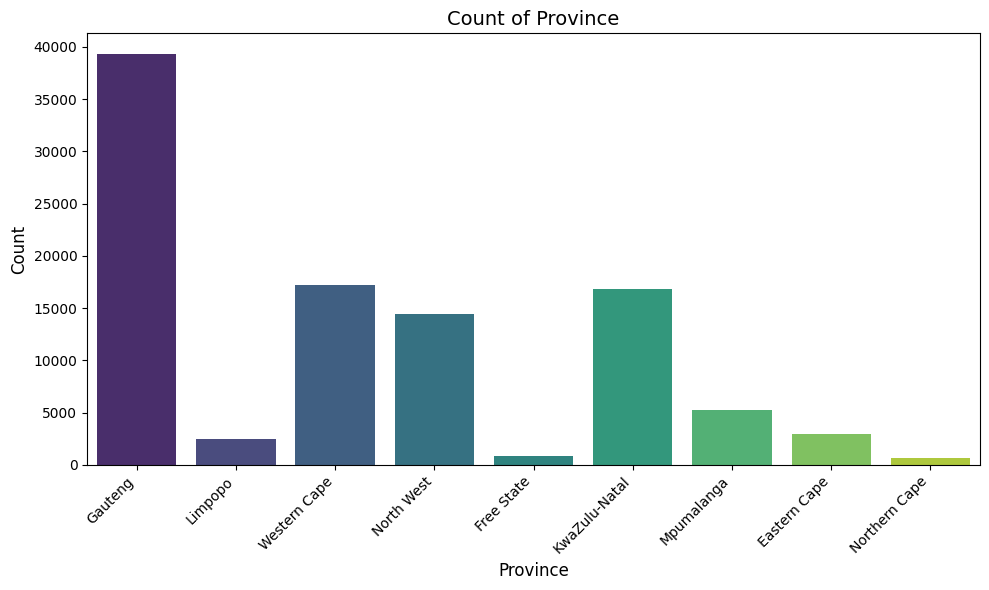

C:\Users\jakin\AppData\Local\Temp\ipykernel_20172\3960170148.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


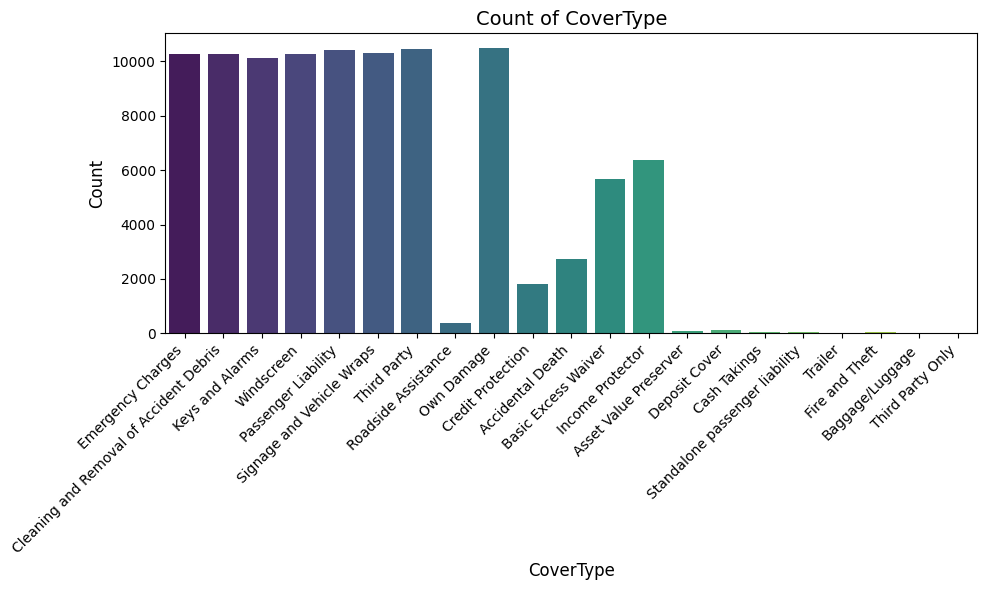

C:\Users\jakin\AppData\Local\Temp\ipykernel_20172\3960170148.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


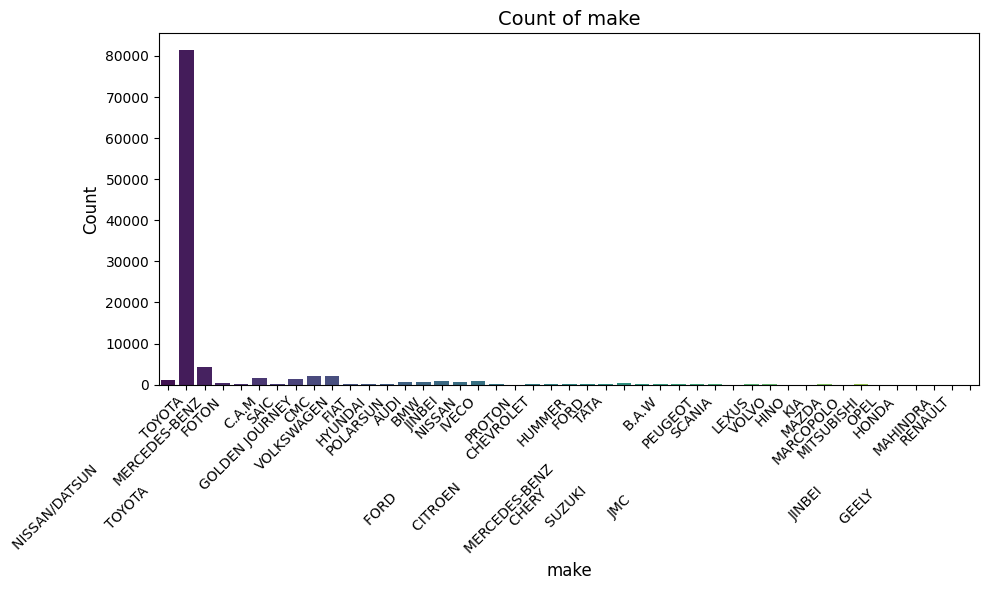

In [10]:
# 1.3 Univariate Analysis
print("\n=== Univariate Analysis ===")
# Select key numerical columns for histograms
key_numerical_cols = ['TotalPremium', 'TotalClaims', 'CalculatedPremiumPerTerm', 'CapitalOutstanding']
for col in key_numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.savefig(f'{viz_dir}/{col}_hist.png')
    plt.close()

# Select key categorical columns for bar charts
key_categorical_cols = ['Province', 'CoverType', 'make']
for col in key_categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Count of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'{viz_dir}/{col}_count.png')
    plt.show()


=== Bivariate/Multivariate Analysis ===


C:\Users\jakin\AppData\Local\Temp\ipykernel_20172\4063477122.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


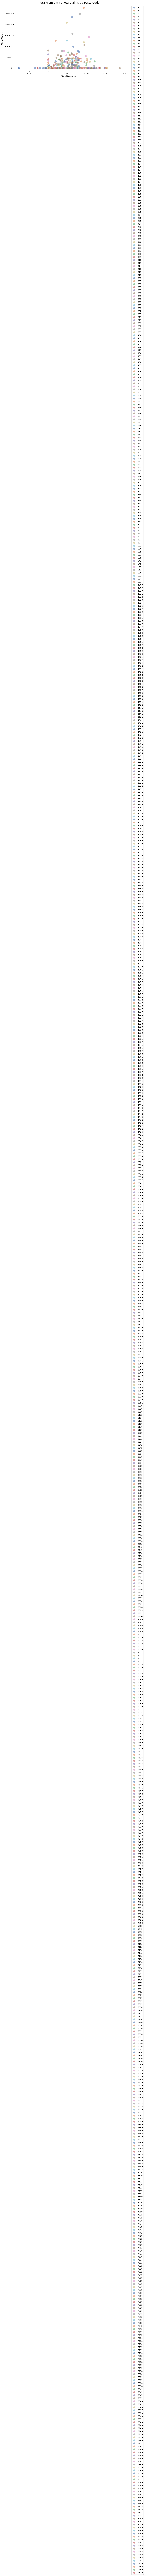

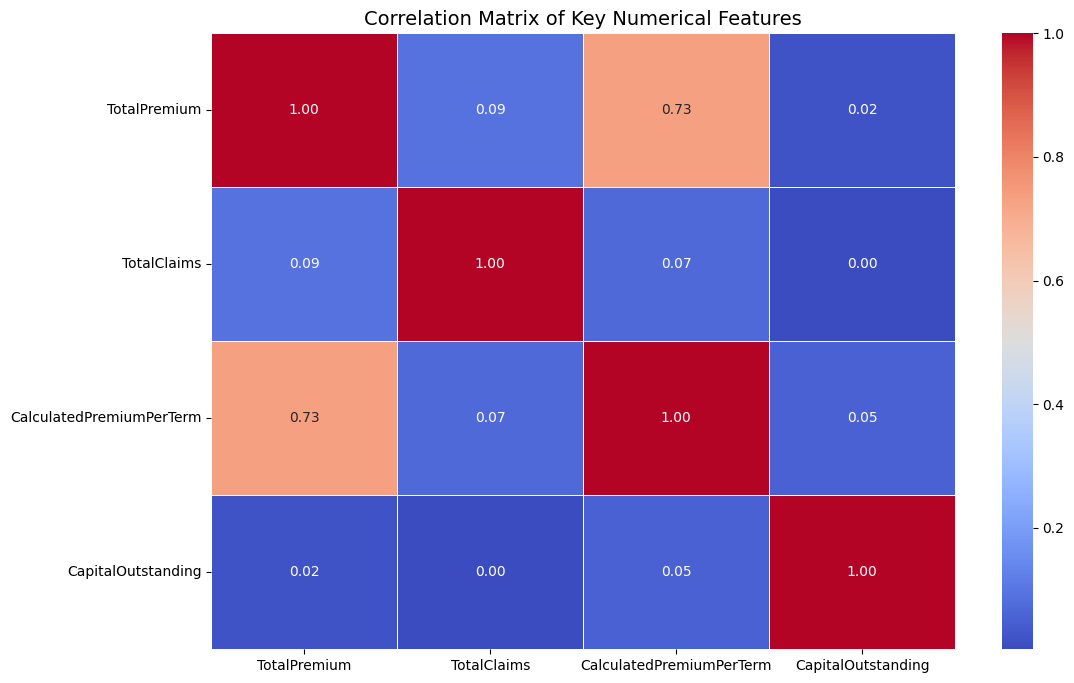

In [11]:
# 1.4 Bivariate/Multivariate Analysis
print("\n=== Bivariate/Multivariate Analysis ===")
# Scatter plot of TotalPremium vs TotalClaims by PostalCode
if 'PostalCode' in df.columns and 'TotalPremium' in df.columns and 'TotalClaims' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='TotalPremium', y='TotalClaims', hue='PostalCode', palette='deep', s=100, alpha=0.6)
    plt.title('TotalPremium vs TotalClaims by PostalCode', fontsize=14)
    plt.xlabel('TotalPremium', fontsize=12)
    plt.ylabel('TotalClaims', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(f'{viz_dir}/premium_vs_claims_by_zip.png')
    plt.show()

# Correlation Matrix for key numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[key_numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Key Numerical Features', fontsize=14)
plt.savefig(f'{viz_dir}/correlation_matrix.png')
plt.show()


=== Data Comparison - Trends Over Geography ===


C:\Users\jakin\AppData\Local\Temp\ipykernel_20172\1205564214.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Province', y='TotalPremium', palette='muted')


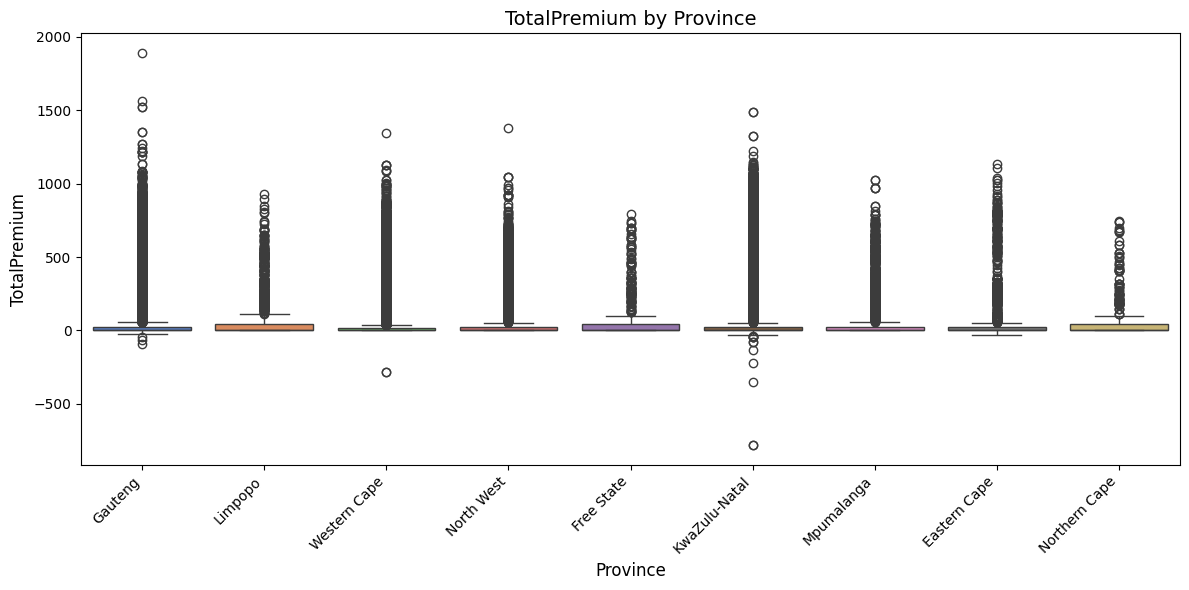

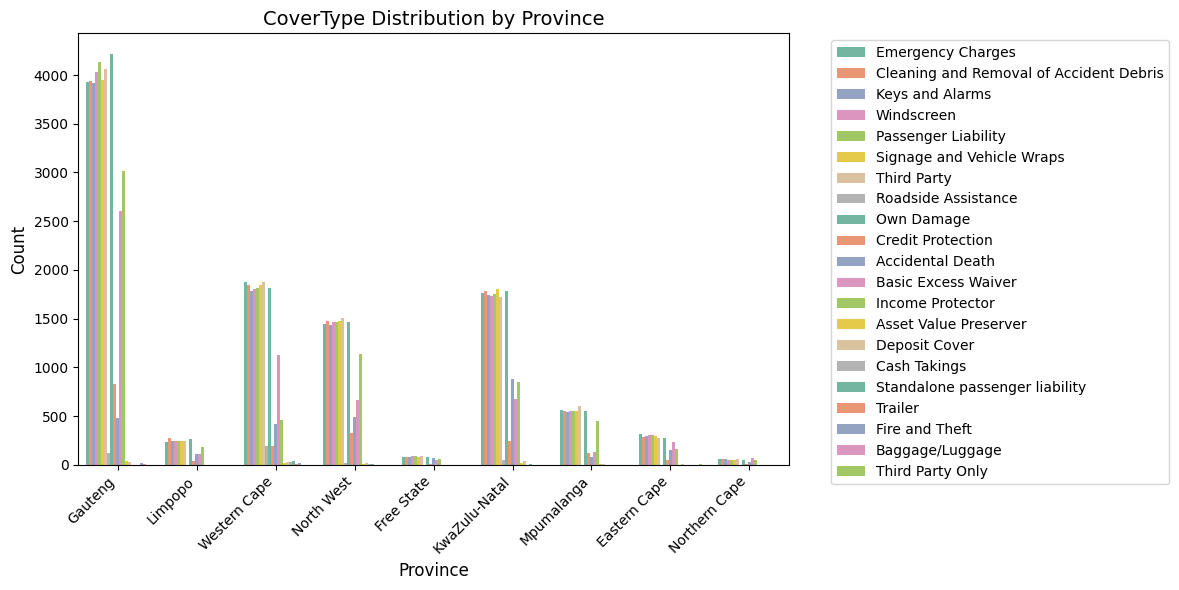

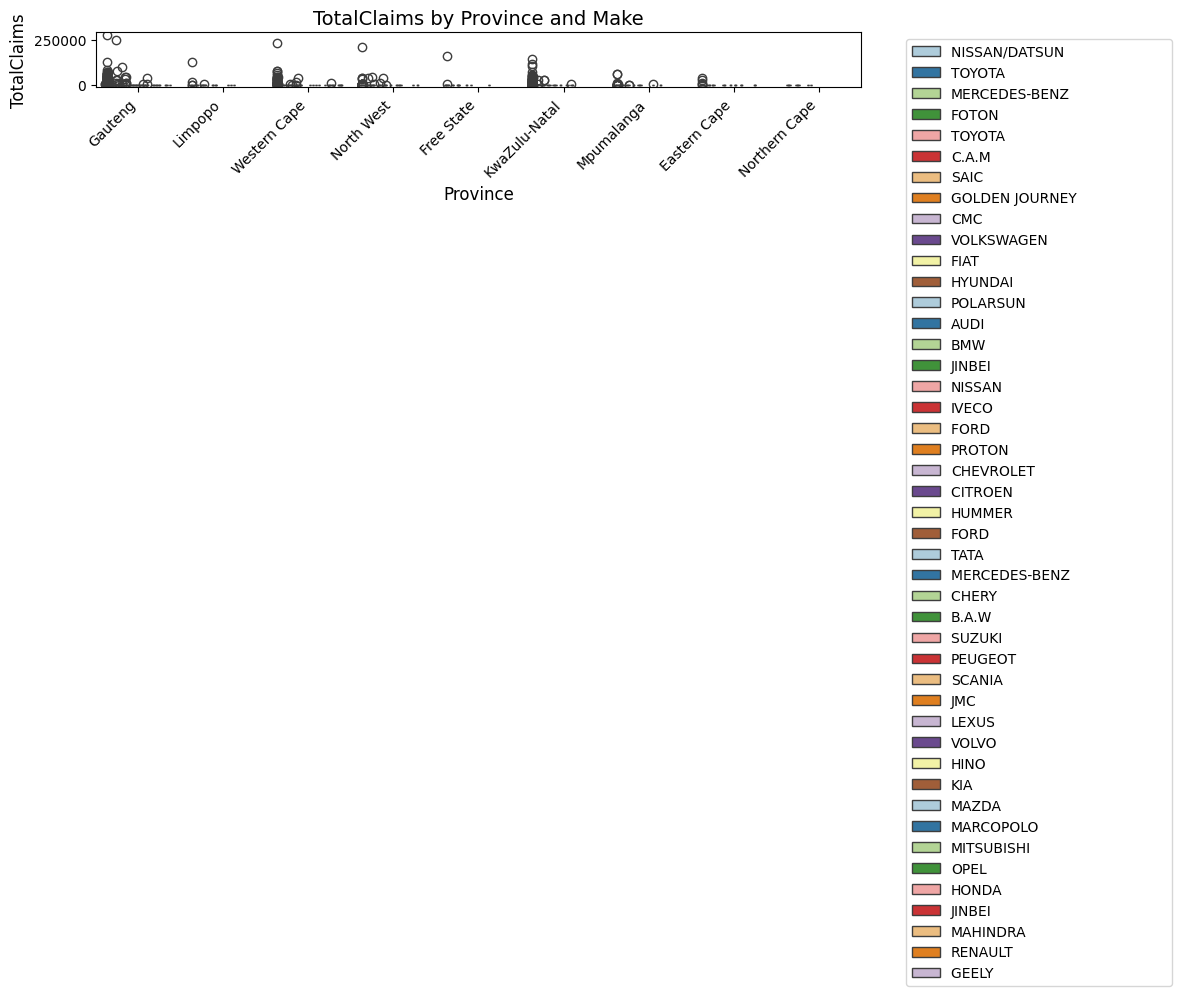

In [12]:
# 1.5 Data Comparison - Trends Over Geography
print("\n=== Data Comparison - Trends Over Geography ===")
if 'Province' in df.columns:
    # Box plot for TotalPremium by Province
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='Province', y='TotalPremium', palette='muted')
    plt.title('TotalPremium by Province', fontsize=14)
    plt.xlabel('Province', fontsize=12)
    plt.ylabel('TotalPremium', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'{viz_dir}/premium_by_province.png')
    plt.show()

    # Count plot for CoverType by Province
    if 'CoverType' in df.columns:
        plt.figure(figsize=(12, 6))
        sns.countplot(data=df, x='Province', hue='CoverType', palette='Set2')
        plt.title('CoverType Distribution by Province', fontsize=14)
        plt.xlabel('Province', fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig(f'{viz_dir}/covertype_by_province.png')
        plt.show()

    # Box plot for make by Province
    if 'make' in df.columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df, x='Province', y='TotalClaims', hue='make', palette='Paired')
        plt.title('TotalClaims by Province and Make', fontsize=14)
        plt.xlabel('Province', fontsize=12)
        plt.ylabel('TotalClaims', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig(f'{viz_dir}/claims_by_province_make.png')
        plt.show()



=== Outlier Detection ===


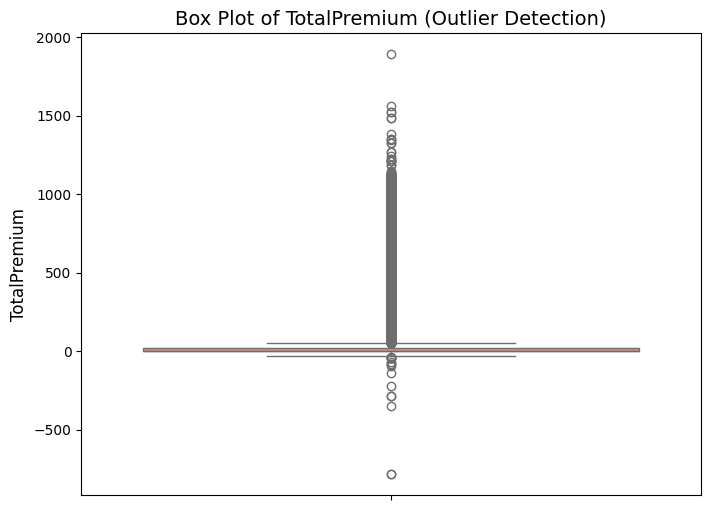

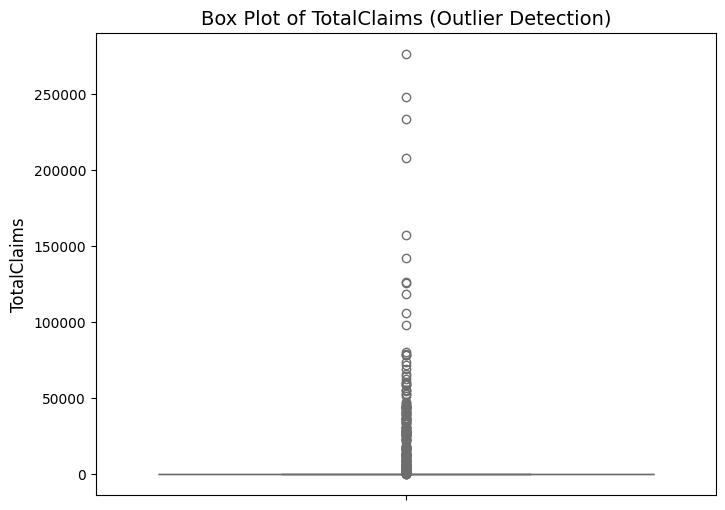

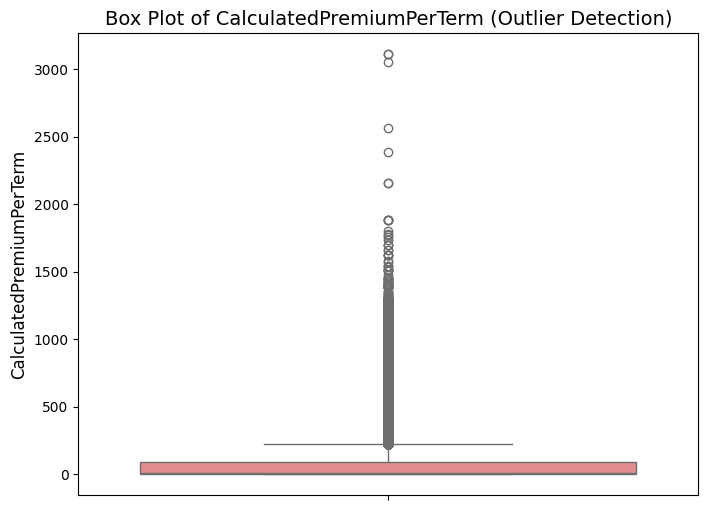

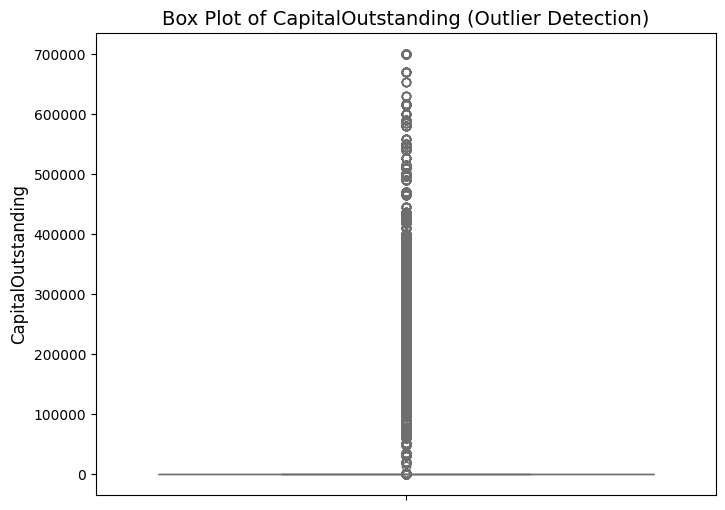

In [13]:
# 1.6 Outlier Detection
print("\n=== Outlier Detection ===")
for col in key_numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, y=col, color='lightcoral')
    plt.title(f'Box Plot of {col} (Outlier Detection)', fontsize=14)
    plt.ylabel(col, fontsize=12)
    plt.savefig(f'{viz_dir}/{col}_boxplot.png')
    plt.show()



=== Creative Visualizations ===


C:\Users\jakin\AppData\Local\Temp\ipykernel_20172\1419044821.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Province', y='LossRatio', palette='magma', ci=None)
C:\Users\jakin\AppData\Local\Temp\ipykernel_20172\1419044821.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Province', y='LossRatio', palette='magma', ci=None)


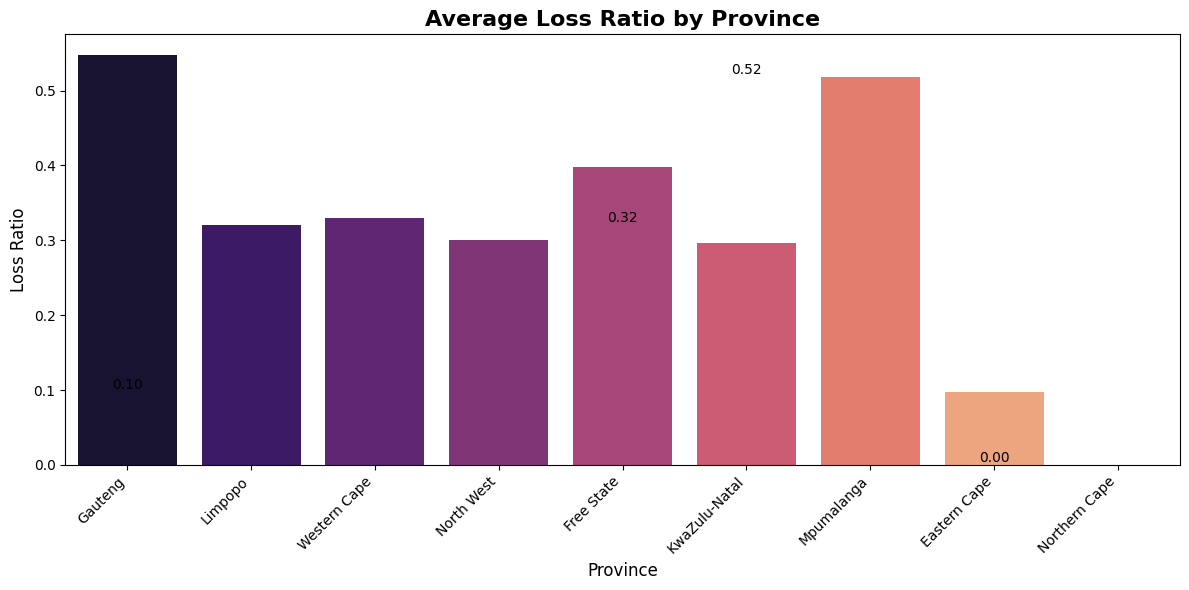

C:\Users\jakin\AppData\Local\Temp\ipykernel_20172\1419044821.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top, x='make', y='TotalClaims', palette='Blues_r')


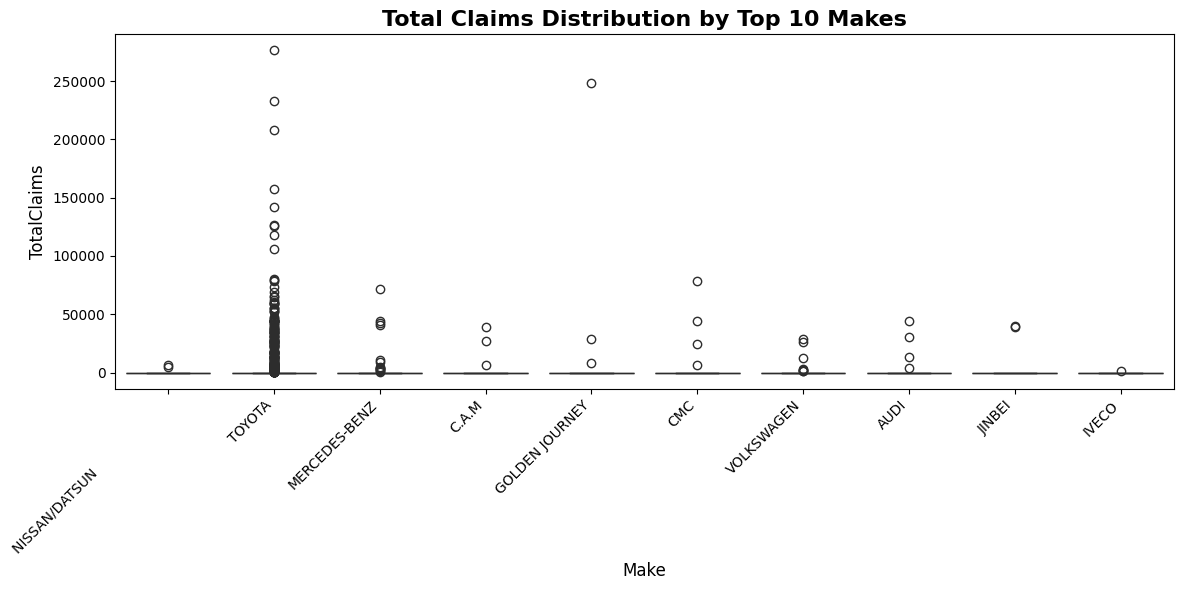

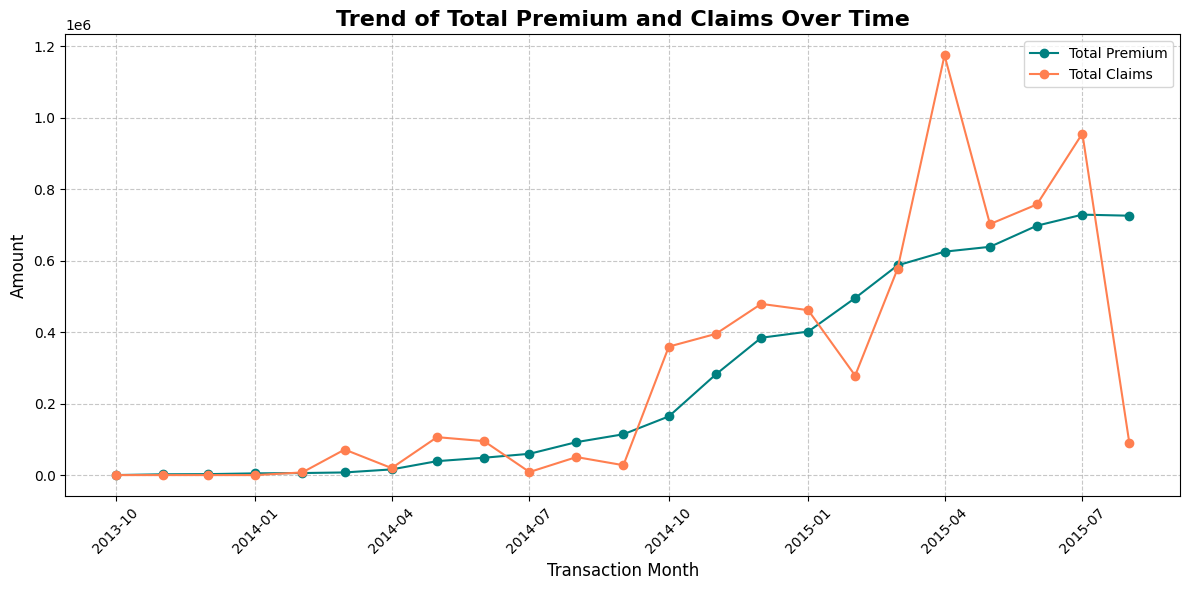

In [14]:
# 1.7 Creative Visualizations
print("\n=== Creative Visualizations ===")
# Insight 1: Loss Ratio by Province
if 'TotalClaims' in df.columns and 'TotalPremium' in df.columns and 'Province' in df.columns:
    df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x='Province', y='LossRatio', palette='magma', ci=None)
    plt.title('Average Loss Ratio by Province', fontsize=16, fontweight='bold')
    plt.xlabel('Province', fontsize=12)
    plt.ylabel('Loss Ratio', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    for i, v in enumerate(df.groupby('Province')['LossRatio'].mean()):
        plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')
    plt.tight_layout()
    plt.savefig(f'{viz_dir}/loss_ratio_by_province.png')
    plt.show()

# Insight 2: TotalClaims by Make (Top 10 Makes)
if 'make' in df.columns:
    top_makes = df['make'].value_counts().nlargest(10).index
    df_top = df[df['make'].isin(top_makes)]
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_top, x='make', y='TotalClaims', palette='Blues_r')
    plt.title('Total Claims Distribution by Top 10 Makes', fontsize=16, fontweight='bold')
    plt.xlabel('Make', fontsize=12)
    plt.ylabel('TotalClaims', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'{viz_dir}/claims_by_top_makes.png')
    plt.show()

# Insight 3: Premium vs Claims Trend Over Time
if 'TransactionMonth' in df.columns:
    df_time = df.groupby('TransactionMonth')[['TotalPremium', 'TotalClaims']].sum().reset_index()
    plt.figure(figsize=(12, 6))
    plt.plot(df_time['TransactionMonth'], df_time['TotalPremium'], label='Total Premium', color='teal', marker='o')
    plt.plot(df_time['TransactionMonth'], df_time['TotalClaims'], label='Total Claims', color='coral', marker='o')
    plt.title('Trend of Total Premium and Claims Over Time', fontsize=16, fontweight='bold')
    plt.xlabel('Transaction Month', fontsize=12)
    plt.ylabel('Amount', fontsize=12)
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'{viz_dir}/premium_claims_trend.png')
    plt.show()